In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
train_transform = transforms.Compose(
    [transforms.RandomHorizontalFlip(),
     transforms.Scale(256),
     #transforms.Resize((224,224)),
     transforms.ColorJitter(brightness=1, contrast=2, saturation=3, hue=0),  # 给图像增加一些随机的光照
     transforms.CenterCrop(224),
     transforms.ToTensor(),                                   # change the PILImages into torch.Tensor
     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
test_transform = transforms.Compose(
    [transforms.Resize(224),
     transforms.ToTensor(),                                  
     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

trainset = torchvision.datasets.ImageFolder\
(root="C:\\Users\\Charl\\Desktop\\ELEC5620\\Dog&Cat\\train\\", transform=train_transform)
valset = torchvision.datasets.ImageFolder\
(root="C:\\Users\\Charl\\Desktop\\ELEC5620\\Dog&Cat\\val\\", transform=test_transform)

C:\Users\Charl\Anaconda3\envs\pytorch\lib\site-packages\torchvision\transforms\transforms.py:188: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
train_transform = transforms.Compose(
    [transforms.RandomSizedCrop(224),
     transforms.RandomHorizontalFlip(),
     #transforms.Resize((224,224)),
     transforms.ColorJitter(brightness=1, contrast=2, saturation=3, hue=0),  # 给图像增加一些随机的光照
     transforms.CenterCrop(224),
     transforms.ToTensor(),                                   # change the PILImages into torch.Tensor
     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
test_transform = transforms.Compose(
    [transforms.Scale(256),
     transforms.CenterCrop(224),
     transforms.ToTensor(),                                  
     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

trainset = torchvision.datasets.ImageFolder\
(root="C:\\Users\\Charl\\Desktop\\ELEC5620\\Dog&Cat\\train\\", transform=train_transform)
valset = torchvision.datasets.ImageFolder\
(root="C:\\Users\\Charl\\Desktop\\ELEC5620\\Dog&Cat\\val\\", transform=test_transform)

In [2]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=False, num_workers=2)
valloader = torch.utils.data.DataLoader(valset, batch_size=32,
                                         shuffle=False, num_workers=2)

In [16]:
len(valset[0])

2

### Here I try VGG19 with randomcrop and normalization:

In [3]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=False, num_workers=2)
valloader = torch.utils.data.DataLoader(valset, batch_size=32,
                                         shuffle=False, num_workers=2)

In [111]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=5, stride=1, padding=2)
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=5, stride=1, padding=2)
        self.pool2 = nn.AvgPool2d(kernel_size=3, stride=2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2)
        #self.pool = nn.MaxPool2d(2, 2)
        self.BN1 = nn.BatchNorm2d(32, eps=1e-5, momentum=0.1, affine=True)
        self.BN2 = nn.BatchNorm2d(64, eps=1e-5, momentum=0.1, affine=True)
        self.fc1 = nn.Linear(64 * 3 * 4, 64)#pool3 要否
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 18)

    def forward(self, x):
        x = self.pool1(F.relu(self.BN1(self.conv1(x))))
        x = self.pool2(F.relu(self.BN1(self.conv2(x))))
        x = self.pool2(F.relu(self.BN2(self.conv3(x))))
        #print(x.shape)
        x = x.view(-1, 64 * 3 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        #x = self.fc3(x)
        x = F.log_softmax(self.fc3(x), dim=1)
        #x = F.tanh(self.fc3(x))
        return x


net = Net()

In [49]:
import torch.nn as nn
import torch.nn.functional as F
#net = torchvision.models.alexnet(pretrained=True)
#net = torchvision.models.alexnet()
net = torchvision.models.resnet18(pretrained=True)
#net = torchvision.models.vgg19(pretrained=True) # this one is not good, too slow and loss is nan
#net = torchvision.models.resnet152(pretrained=True)
for p in net.parameters():
    p.requires_grad = False
num_ftrs = net.fc.in_features
net.fc = nn.Linear(num_ftrs, 18)

In [7]:
net

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [50]:
import torch.optim as optim
from torch.optim import lr_scheduler
import time
import copy
import os
#net = Net()
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay = 0.0005)
#exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
#inputs, labels = Variable(inputs), Variable(labels)

In [51]:
%%time
average_loss_series = []
val_correct3 = []
for epoch in range(4):  # loop over the dataset multiple times
    
    running_loss = 0.0

    for i, data in enumerate(trainloader):
        # get the inputs
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 500 mini-batches
            average_loss = running_loss/500
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, average_loss))
            average_loss_series.append(average_loss)
            running_loss = 0.0
    
    correct = 0
    total = 0
    with torch.no_grad():
        for i, data in enumerate(valloader):
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        val_correct3.append(correct / total)
    print('Accuracy of the network on the 355 val images: {:.1f}%'.format(100 * correct / total))

print('Finished Training')

[1,   500] loss: 2.898
[1,  1000] loss: 3.236
Accuracy of the network on the 355 val images: 5.1%
[2,   500] loss: 2.897
[2,  1000] loss: 3.234
Accuracy of the network on the 355 val images: 5.1%
[3,   500] loss: 2.899
[3,  1000] loss: 3.234
Accuracy of the network on the 355 val images: 5.1%
[4,   500] loss: 2.897
[4,  1000] loss: 3.237
Accuracy of the network on the 355 val images: 5.1%
Finished Training
Wall time: 36min 25s


In [34]:
val_correct3

[0.059154929577464786,
 0.059154929577464786,
 0.059154929577464786,
 0.059154929577464786]

### start from here

In [42]:
from __future__ import print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

In [35]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = ''
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [40]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

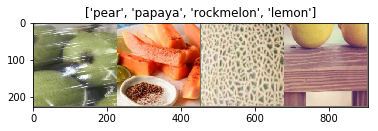

In [43]:
# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])


In [44]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [45]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [52]:
model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [46]:
model_ft = models.resnet18(pretrained=True)
for p in net.parameters():
    p.requires_grad = False
    
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 18)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [47]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------
train Loss: 1.7684 Acc: 0.4659
val Loss: 0.9111 Acc: 0.7662

Epoch 1/24
----------
train Loss: 1.2678 Acc: 0.6144
val Loss: 0.6658 Acc: 0.8028

Epoch 2/24
----------
train Loss: 1.1263 Acc: 0.6574
val Loss: 0.6041 Acc: 0.8338

Epoch 3/24
----------
train Loss: 1.0470 Acc: 0.7013
val Loss: 0.7123 Acc: 0.8028

Epoch 4/24
----------
train Loss: 0.9727 Acc: 0.7141
val Loss: 0.5641 Acc: 0.8479

Epoch 5/24
----------
train Loss: 0.8603 Acc: 0.7464
val Loss: 0.4467 Acc: 0.8873

Epoch 6/24
----------
train Loss: 0.9471 Acc: 0.7087
val Loss: 0.6793 Acc: 0.8423

Epoch 7/24
----------
train Loss: 0.6646 Acc: 0.8026
val Loss: 0.4047 Acc: 0.9155

Epoch 8/24
----------
train Loss: 0.5152 Acc: 0.8415
val Loss: 0.4189 Acc: 0.9042

Epoch 9/24
----------
train Loss: 0.5160 Acc: 0.8436
val Loss: 0.4097 Acc: 0.9014

Epoch 10/24
----------
train Loss: 0.4738 Acc: 0.8552
val Loss: 0.3822 Acc: 0.9239

Epoch 11/24
----------
train Loss: 0.4373 Acc: 0.8730
val Loss: 0.3897 Acc: 0.9155

Ep

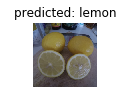

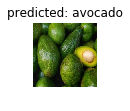

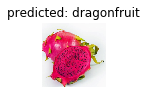

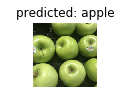

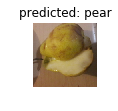

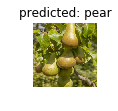

In [48]:
visualize_model(model_ft)